In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from descarga_st import rescata_dataset
from descarga_usuarios import rescata_usuarios
from calcula import  grafica_meses, grafica_ultimo_mes
from grafica import grafica_atributo_mes, grafica_atributo_evolutivo
from calcula_aux import aplicar_formulas_kpi, medidas_centrales
import nest_asyncio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
nest_asyncio.apply()

In [2]:
""" import aiohttp
import datetime as dt
import pandas as pd
import asyncio
from typing import Optional, List, Tuple
import streamlit as st

async def consulta(
    fecha_inicio: str,
    fecha_fin: str,
    compania: str = "9",
    corredora: str = "SANTANDER",
    
    api_url: str = "https://www.let.cl/wslet/consulta/reporteConsultorExterno",
    periodo_dias: int = 10
) -> Optional[pd.DataFrame]:
    ""
    Realiza consultas a la API en intervalos de 10 días y combina los resultados en un solo DataFrame, cubriendo un total de 6 meses.

    Args:
        compania: Código de la compañía.
        corredora: Nombre de la corredora.
        fecha_inicio: Fecha de inicio de la consulta (formato YYYY-MM-DD).
        fecha_fin: Fecha de fin de la consulta (formato YYYY-MM-DD).
        api_url: URL de la API.
        periodo_dias: Período de cada consulta en días.

    Returns:
        Un DataFrame de pandas con la combinación de los resultados de la API, o None en caso de error.
    ""
    headers = {
        "authorization": st.secrets["api_auth"],  # Usar el secreto de Streamlit
        "compania": compania,
        "corredora": corredora,
    }

    inicio = dt.datetime.strptime(fecha_inicio, "%Y-%m-%d")
    fin = dt.datetime.strptime(fecha_fin, "%Y-%m-%d")
    periodos = []
    dataframes: List[pd.DataFrame] = []  # Lista para almacenar los DataFrames

    # Calcular los períodos de consulta
    while inicio < fin:
        fin_periodo = inicio + dt.timedelta(days=periodo_dias)
        if fin_periodo > fin:
            fin_periodo = fin
        periodos.append((inicio, fin_periodo))
        inicio = fin_periodo

    async with aiohttp.ClientSession() as session:
        for inicio_periodo, fin_periodo in periodos:
            headers["fecha_inicial"] = inicio_periodo.strftime("%Y-%m-%d")
            headers["fecha_final"] = fin_periodo.strftime("%Y-%m-%d")

            try:
                async with session.get(api_url, headers=headers, timeout=60) as response:  # Agregar timeout
                    if response.status == 200:
                        response_text = await response.text()
                        # Guardar respuesta en archivo (opcional, para debugging)
                        with open("consulta_resultado.txt", "a", encoding='cp1252') as file:
                            file.write(f"{dt.datetime.now()} - Periodo: {inicio_periodo} - {fin_periodo}\n{response_text}\n")
                        print(
                            "Success: Result saved to consulta_resultado.txt",
                            dt.datetime.now(),
                            f"Periodo: {inicio_periodo} - {fin_periodo}",
                        )
                        # Convertir la respuesta a DataFrame y agregar a la lista
                        try:
                            df_periodo = pd.read_csv(io.StringIO(response_text), sep=";")
                            dataframes.append(df_periodo)
                        except Exception as e:
                            print(f"Error al leer CSV: {e}")
                            print(f"Texto de la respuesta:\n{response_text}")
                            return None  # Importante: retornar None en caso de error al procesar el CSV

                    else:
                        print(
                            "Failed:",
                            response.status,
                            await response.text(),
                            f"Periodo: {inicio_periodo} - {fin_periodo}",
                        )
                        return None  # Retornar None en caso de error en la llamada a la API
            except aiohttp.ClientError as e:
                print(f"Error de conexión: {e}, Periodo: {inicio_periodo} - {fin_periodo}")
                return None  # Retornar None en caso de error de conexión
            except asyncio.TimeoutError:
                print(f"Timeout al consultar la API, Periodo: {inicio_periodo} - {fin_periodo}")
                return None # Retornar None en caso de Timeout

        # Combinar todos los DataFrames en uno solo
        if dataframes:
            df_final = pd.concat(dataframes, ignore_index=True)
            return df_final
        else:
            return None  # Retornar None si no se obtuvieron datos

await consulta( "2025-04-15", "2025-05-10","9", "SANTANDER") """

' import aiohttp\nimport datetime as dt\nimport pandas as pd\nimport asyncio\nfrom typing import Optional, List, Tuple\nimport streamlit as st\n\nasync def consulta(\n    fecha_inicio: str,\n    fecha_fin: str,\n    compania: str = "9",\n    corredora: str = "SANTANDER",\n\n    api_url: str = "https://www.let.cl/wslet/consulta/reporteConsultorExterno",\n    periodo_dias: int = 10\n) -> Optional[pd.DataFrame]:\n    ""\n    Realiza consultas a la API en intervalos de 10 días y combina los resultados en un solo DataFrame, cubriendo un total de 6 meses.\n\n    Args:\n        compania: Código de la compañía.\n        corredora: Nombre de la corredora.\n        fecha_inicio: Fecha de inicio de la consulta (formato YYYY-MM-DD).\n        fecha_fin: Fecha de fin de la consulta (formato YYYY-MM-DD).\n        api_url: URL de la API.\n        periodo_dias: Período de cada consulta en días.\n\n    Returns:\n        Un DataFrame de pandas con la combinación de los resultados de la API, o None en cas

In [3]:
data = rescata_dataset()

Consultando API... compania=9, corredora=SANTANDER
Dataset ya cargado, no se vuelve a consultar
Index(['id_inspeccion', 'metaOI', 'oi_asociada_meta', 'cia', 'num_interno',
       'corredor', 'num_corredor', 'ramo', 'marca', 'modelo', 'patente',
       'chasis', 'estado', 'fecha_emision', 'hora_emision', 'fecha_1_llamada',
       'hora_1_llamada', 'num_llamadas_totales', 'fecha_ult_devol',
       'motivo_ult_dev', 'comentario_ult_dev', 'num_dev_totales',
       'fecha_ult_reintento', 'hora_ult_reintento', 'comentario_ult_reintento',
       'num_total_reintento', 'fecha_1_llamada_post_ult_reintento',
       'hora_1_llamada_post_ult_reintento', 'fecha_1_agendamiento',
       'hora_1_agendamiento', '', 'fecha_ult_agendamiento',
       'hora_ult_agendamiento', 'num_agendamiento_totales',
       'fecha_cita_conreta_inspeccion', 'hora_cita_conreta_inspeccion',
       'inspector', 'realizada_app', 'fecha_inicio_inspeccion',
       'hora_inicio_inspeccion', 'fecha_termino_inspeccion',
       'h

In [4]:
df_calc = aplicar_formulas_kpi(data)

c:\AAA Python\202503_LET_DASH\do_streamlit\calcula_aux.py:674: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fecha_mayor = pd.to_datetime(fecha_mayor, errors='coerce')
c:\AAA Python\202503_LET_DASH\do_streamlit\calcula_aux.py:280: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fecha_fin = pd.to_datetime(fecha_fin, errors='coerce')
c:\AAA Python\202503_LET_DASH\do_streamlit\calcula_aux.py:674: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fecha_mayor = pd.to_datetime(fecha_mayor, errors='coerce')
c:\AAA Python\202503_LET_DASH\do_streamlit\calcula_aux.py:280: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was sp

In [ ]:
nueve_horas_en_fraccion = 0.375

# Apply the logic to calculate "resp BO GRAL CEILING OK" for each row in the dataset
def calcular_resp_bo_gral_ceiling_ok(row):
    resp_bo_gral_ceiling = row["resp BO GRAL CEILING"]
    if resp_bo_gral_ceiling == "n/a":
        return "n/a"
    elif resp_bo_gral_ceiling == "9+":
        return "9+"
    elif isinstance(resp_bo_gral_ceiling, (int, float)) and resp_bo_gral_ceiling > nueve_horas_en_fraccion:
        return "9+"
    elif isinstance(resp_bo_gral_ceiling, (int, float)):
        return resp_bo_gral_ceiling
    return None

# Add the new column to the dataframe
df_calc["resp BO GRAL CEILING OK"] = df_calc.apply(calcular_resp_bo_gral_ceiling_ok, axis=1)

df_calc["resp BO GRAL CEILING OK"].value_counts()

df_calc["resp BO GRAL CEILING OK HMS"] = df_calc["resp BO GRAL CEILING OK"].apply(
    lambda x: f"{int(x * 24):02d}:{int((x * 24 * 60) % 60):02d}" if isinstance(x, (int, float)) else "n/a"
)

df_calc["resp BO GRAL CEILING OK HMS"].value_counts()

NameError: name 'nueve_horas_en_fraccion' is not defined

['resp BO GRAL CEILING OK HMS']


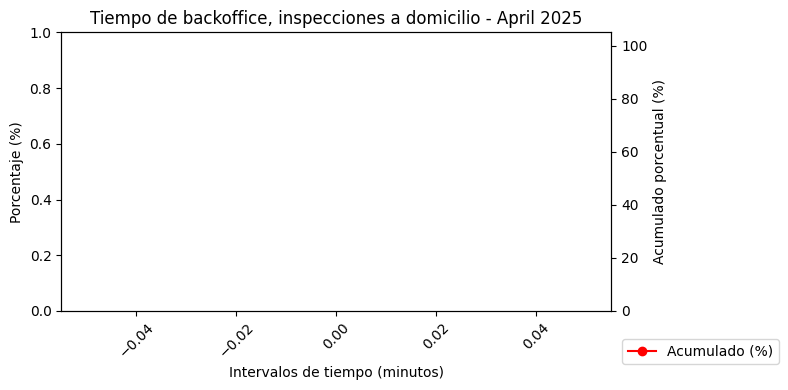

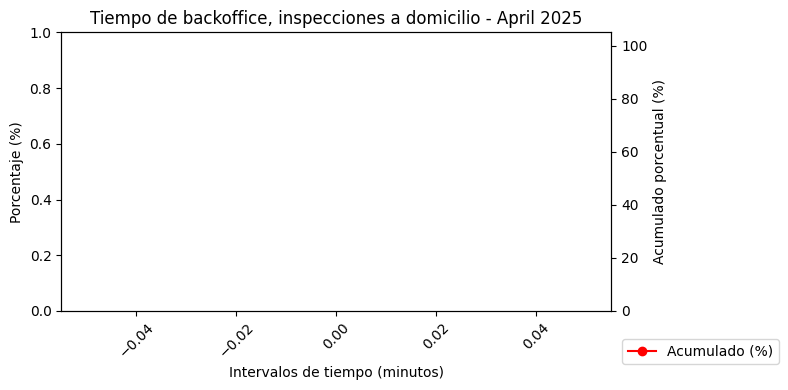

C:\Users\cmenajovsky\AppData\Local\Temp\ipykernel_29896\2038493546.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot13.show()


In [7]:
%matplotlib inline
plot13 = grafica_atributo_mes(df_calc, 'resp BO GRAL CEILING OK HMS', "Tiempo de backoffice, inspecciones a domicilio")
plot13.show()

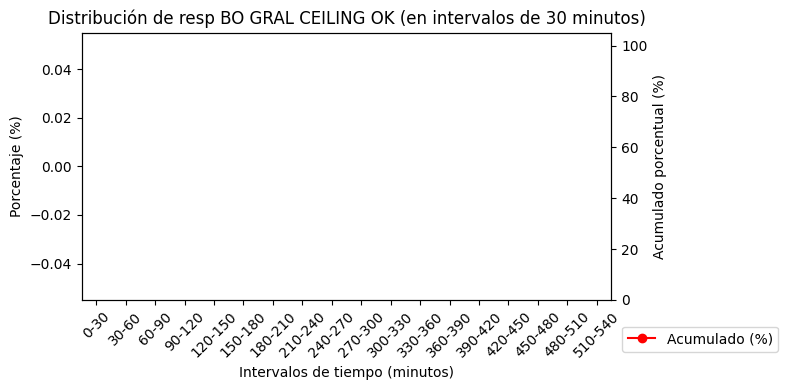

In [9]:
col_interes = ['cálculo resp BO DOM HMS']
col_interes = ['KPI resp BO DOM CEILING OK']
col_interes = ['resp BO GRAL HMS']
col_interes = ['resp BO GRAL CEILING OK']

for col in col_interes:
    valid_values = df_calc[col][~df_calc[col].isin(["error", "n/a"])]

    if valid_values.empty:
        continue

    def convertir_a_minutos(valor):
        if isinstance(valor, str) and ":" in valor:
            horas, minutos = map(int, valor.split(":"))
            return horas * 60 + minutos
        elif valor == "9+":
            return 540
        return None

    # Remove NaN values before applying the conversion function
    valid_values = valid_values.dropna()
    valid_values_minutos = valid_values.apply(convertir_a_minutos)

    if valid_values_minutos.dropna().empty:
        print(f"No valid data to process for column {col}.")
        continue

    max_minutos = valid_values_minutos.max()
    bins = list(range(0, int(max_minutos) + 30, 30))
    labels = [f"{i}-{i+30}" for i in bins[:-1]]

    binned_values = pd.cut(valid_values_minutos, bins=bins, labels=labels, right=False)

    percent = binned_values.value_counts(normalize=True).reindex(labels, fill_value=0) * 100
    acumulado_percent = percent.cumsum()

    fig, ax1 = plt.subplots(figsize=(8, 4))  # un poco más ancho para dar espacio a la leyenda

    sns.barplot(x=percent.index, y=percent.values, order=labels, ax=ax1, color="skyblue")
    ax1.set_title(f"Distribución de {col} (en intervalos de 30 minutos)")
    ax1.set_xlabel("Intervalos de tiempo (minutos)")
    ax1.set_ylabel("Porcentaje (%)")
    ax1.tick_params(axis="x", rotation=45)

    for p in ax1.patches:
        height = p.get_height()
        ax1.annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom', fontsize=8)

    ax2 = ax1.twinx()
    ax2.plot(labels, acumulado_percent.values, color="red", marker="o", linestyle="-", label="Acumulado (%)")
    ax2.set_ylabel("Acumulado porcentual (%)")
    ax2.set_ylim(0, 105)

    # Mover leyenda fuera del gráfico
    ax2.legend(loc="upper left", bbox_to_anchor=(1.02, -0.1), borderaxespad=0)

    plt.tight_layout()
    plt.show()
